### Homework D - Time Series Prediction using Reservoir Computing ###

Author: Jesper Olsson

***

In [181]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Problem 1 - Create dataset by solving the Lorenz system

2500


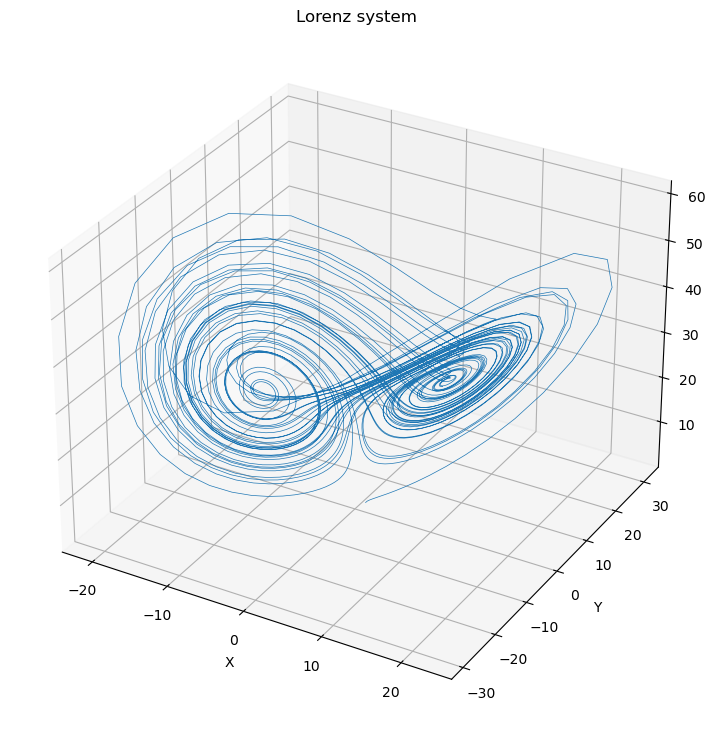

In [182]:
# Define Lorenz system
def lorenz(x, y, z, sigma, r, b):
    x_dot = sigma * (y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    
    return x_dot, y_dot, z_dot

# Solve the system
dt = 0.02
num_steps = int(50/dt)
print(num_steps)
time = np.linspace(0, num_steps*dt, num_steps)
# Initial conditions
sigma = 10
r = 28
b = 8/3
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)

x[0], y[0], z[0] = (1, 1, 1)

for t in range(num_steps-1):
    x_dot, y_dot, z_dot = lorenz(x[t], y[t], z[t], sigma, r, b)
    
    x[t+1] = x[t] + (x_dot * dt)
    y[t+1] = y[t] + (y_dot * dt)
    z[t+1] = z[t] + (z_dot * dt)

# Plot the solution
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 9))

# 3D plot
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz system')
ax.plot(x, y, z, lw=0.5)
plt.show()

Problem 2 - Set up a single-layer reservoir and minimize energy function

(10, 2000) (3, 2000) (2000, 10) (10, 10)
(3, 10) (10, 2000)
(3, 2000) (3, 500)


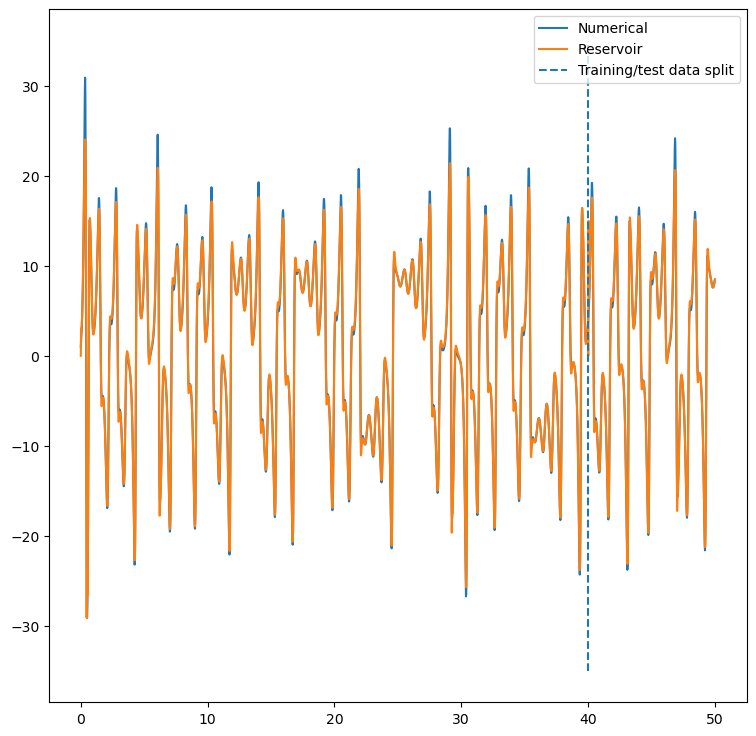

In [183]:
# Define the network
N = 3 # Number of input neurons
N_res = 10 # Number of reservoir neurons

W_in = np.random.uniform(0,np.sqrt(0.002), size=(N_res, N)) # Input weights
W_res = np.random.uniform(0,np.sqrt(2/500), size=(N_res, N_res)) # Reservoir weights

# Train the network
train_share = 0.8 # Share of data used for training
data = np.array([x, y, z]) # Training data
train_data = data[:, :int(train_share*num_steps)] # Training data
test_data = data[:, int(train_share*num_steps):] # Test data

num_steps_train = train_data.shape[1] # Number of training steps
R = np.zeros((N_res, num_steps_train)) # Reservoir states, initialized to 0What is ridge regres

for t in range(num_steps_train-1):
    X = train_data[:,t]
    r = R[:,t]
    
    R[:,t+1] = np.tanh(W_res @ r + W_in @ X)

I = np.eye(N_res) # Identity matrix
lambda_p = 0.1 # Ridge regression parameter

print(R.shape, train_data.shape, R.T.shape, I.shape)
M1 = train_data @ R.T
M2 = R @ R.T + lambda_p**2*I
W_out = M1 @ np.linalg.inv(M2)

print(W_out.shape, R.shape)
O_train = W_out @ R

num_steps_test = test_data.shape[1] # Number of test steps
# Predict the test data
R = np.zeros((N_res, num_steps_test)) # Reservoir states, initialized to 0
for t in range(num_steps_test-1):
    X = test_data[:,t]
    r = R[:,t]
    
    R[:,t+1] = np.tanh(W_res @ r + W_in @ X)
    
O_pred = W_out @ R

# Plot the results
fig = plt.figure(figsize=(9, 9))
print(O_train.shape, O_pred.shape)
plt.plot(time, data[1], label='Numerical')
plt.plot(time, np.hstack((O_train[1], O_pred[1])), label='Reservoir')
plt.vlines(time[int(train_share*num_steps)], -35, 35, linestyles='dashed', label='Training/test data split')
plt.legend()
plt.show()
# fig = plt.figure(figsize=(18, 9))
# (ax1, ax2) = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')

# ax1.set_xlabel('X')
# ax1.set_ylabel('Y')
# ax1.set_zlabel('Z')
# ax1.set_title('Lorenz system')
# ax1.plot(x, y, z, lw=0.5)

# ax2.set_xlabel('X')
# ax2.set_ylabel('Y')
# ax2.set_zlabel('Z')
# ax2.set_title('Reservoir computing')
# ax2.plot(O[0], O[1], O[2], lw=0.5)